In [1]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
!pip install mpl-finance
!pip install xgboost
!pip install feature_selector
!pip install lightgbm
!pip install --upgrade numpy
!pip install --upgrade pandas

--2019-06-26 06:19:04--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2019-06-26 06:19:04--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://managedway.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2019-06-26 06:19:04--  https://managedway.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving managedway

     |████████████████████████████████| 17.3MB 3.3MB/s 
ERROR: yellowbrick 0.9.1 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.
ERROR: imbalanced-learn 0.4.3 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.1 which is incompatible.
ERROR: feature-selector 1.0.0 has requirement numpy==1.14.5, but you'll have numpy 1.16.4 which is incompatible.
ERROR: fbprophet 0.5 has requirement pandas>=0.23.4, but you'll have pandas 0.23.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.14.5
    Uninstalling numpy-1.14.5:
      Successfully uninstalled numpy-1.14.5


     |████████████████████████████████| 10.1MB 3.4MB/s 
ERROR: feature-selector 1.0.0 has requirement numpy==1.14.5, but you'll have numpy 1.16.4 which is incompatible.
ERROR: feature-selector 1.0.0 has requirement pandas==0.23.1, but you'll have pandas 0.24.2 which is incompatible.
  Found existing installation: pandas 0.23.1
    Uninstalling pandas-0.23.1:
      Successfully uninstalled pandas-0.23.1


In [2]:

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
%cd /content/drive/My\ Drive/21_4
!ls

/content/drive/My Drive/21_4
'Copy of dubug.ipynb'			  data_preprocessing.py
'Copy of feature_selection_debug.ipynb'   __pycache__


In [0]:
import numpy as np
import pandas as pd
import talib
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from data_preprocessing import *

In [5]:
# You may want to change the path here
data = read_file("/content/drive/My Drive/21_4/AUDJPY.txt")

dataset=Nodate_HLOC(data,'1h')
print(len(dataset))

111444


In [0]:
# all features
feature_list = ["<OPEN>","<HIGH>","<LOW>","<CLOSE>",'50day MA','50EMA','Std_dev','RSI',"Williams %R",'upperband','lowerband',
                'MACD','SAR','CCI','ADX','STOCHslowk','STOCHslowd','ADXR','APO','AROONDOWN',
                'AROONUP','AROONOSC','BOP','CMO','DX','ACDEXT','MACDSIGNALEXT','MACDHISTEXT',
                'MACDFIX','MACDSIGNALFIX','MACDHISTFIX','MINUS_DI','MINUS_DM','MOM','PLUS_DI',
                'PLUS_DM','PPO','ROC','ROCP','ROCR','ROCR100','STOCHFFASTK','STOCHFFASTD',
                'STOCHRSIFASTK','STOCHRSIFASTD','TRIX','ULTOSC', 'DEMA', 'HT_TRENDLINE',
                'KAMA','MIDPOINT','MIDPRICE','SAREXT','SMA','T3','TEMA', 'TRIMA','WMA']

In [7]:
timeframe = "1H"
pattern_index = "SHORTLINE"
window_size = 14

features1,y,all_df=set_features(dataset,pattern_index,feature_list,window_size)

/content/drive/My Drive/21_4/data_preprocessing.py:339: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  new_test_df["pattern"] = all_idx
/content/drive/My Drive/21_4/data_preprocessing.py:341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  new_test_df["label"] = la
/content/drive/My Drive/21_4/data_preprocessing.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [0]:

df = all_df[all_df['label'] != -1][feature_list]

from feature_selector import FeatureSelector
fs = FeatureSelector(data = df, labels = y)

In [9]:
#collinear
fs.identify_collinear(correlation_threshold = 0.90)

32 features with a correlation magnitude greater than 0.90.



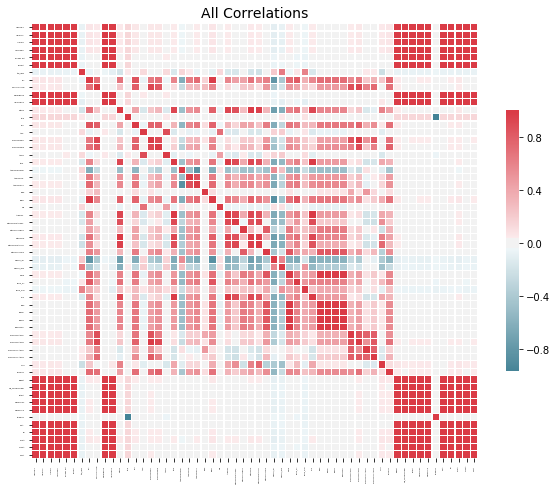

In [10]:
fs.plot_collinear(plot_all = True)

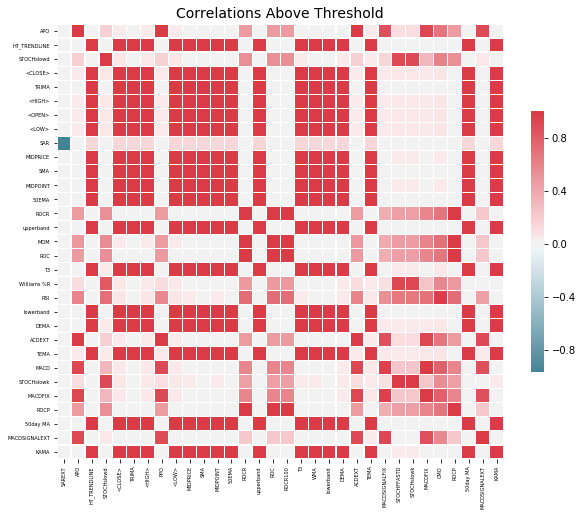

In [11]:
fs.plot_collinear()

In [12]:
train_no_collinear = fs.remove(methods = ['collinear'])

Removed 32 features.


In [13]:
train_no_collinear.columns.tolist() 


['<OPEN>',
 'Std_dev',
 'RSI',
 'Williams %R',
 'MACD',
 'SAR',
 'CCI',
 'ADX',
 'ADXR',
 'AROONDOWN',
 'AROONUP',
 'AROONOSC',
 'BOP',
 'DX',
 'MACDHISTEXT',
 'MACDHISTFIX',
 'MINUS_DI',
 'MINUS_DM',
 'MOM',
 'PLUS_DI',
 'PLUS_DM',
 'STOCHFFASTK',
 'STOCHRSIFASTK',
 'STOCHRSIFASTD',
 'TRIX',
 'ULTOSC']